In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing the dataset
precipitation=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\Precipitation\Precipitation.csv")

In [3]:
precipitation

,Year,Month,Precipitation_past,Precipitation_pasttopast,Precipitation
0,2002,1,0.60,0.15,2.38
1,2002,2,0.00,7.33,0.22
2,2002,3,0.17,0.60,0.62
3,2002,4,14.73,3.74,4.28
4,2002,5,20.62,56.82,36.25
...,...,...,...,...,...
211,2019,8,4.53,158.06,40.58
212,2019,9,1.98,205.18,197.04
213,2019,10,0.74,127.22,124.80
214,2019,11,0.44,1.73,17.29


In [4]:
precipitation.shape

(216, 5)

In [5]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      216 non-null    int64  
 1   Month                     216 non-null    int64  
 2   Precipitation_past        216 non-null    float64
 3   Precipitation_pasttopast  216 non-null    float64
 4   Precipitation             216 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=precipitation.corr()
corr_matrix

,Year,Month,Precipitation_past,Precipitation_pasttopast,Precipitation
Year,1.000000e+00,4.861859e-15,-0.044505,0.037767,-0.007101
Month,4.861859e-15,1.000000e+00,0.257592,0.267777,0.231468
Precipitation_past,-4.450462e-02,2.575918e-01,1.000000,0.725064,0.655949
Precipitation_pasttopast,3.776709e-02,2.677771e-01,0.725064,1.000000,0.701112
Precipitation,-7.100952e-03,2.314681e-01,0.655949,0.701112,1.000000


In [8]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [9]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [10]:
precipitation=precipitation.drop(['Year'],axis=1)

In [11]:
precipitation.shape

(216, 4)

In [12]:
X=precipitation.drop('Precipitation',axis=1)
y=precipitation.Precipitation

In [13]:
X

,Month,Precipitation_past,Precipitation_pasttopast
0,1,0.60,0.15
1,2,0.00,7.33
2,3,0.17,0.60
3,4,14.73,3.74
4,5,20.62,56.82
...,...,...,...
211,8,4.53,158.06
212,9,1.98,205.18
213,10,0.74,127.22
214,11,0.44,1.73


In [14]:
y

0        2.38
1        0.22
2        0.62
3        4.28
4       36.25
        ...  
211     40.58
212    197.04
213    124.80
214     17.29
215      2.68
Name: Precipitation, Length: 216, dtype: float64

In [15]:
X.shape

(216, 3)

In [16]:
y.shape

(216,)

In [17]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [18]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [19]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [20]:
li=LinearRegression()

In [21]:
li.fit(X_train,y_train)

LinearRegression()

In [22]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 13.05331324, 196.58348373,  84.45964323,   8.94922084,
         9.39760379,  23.00307742,  13.64154253, 138.15317899,
       103.84957394, 122.71664814,  65.33871282, 104.10646816,
        50.44453903,   9.66337655, 103.87185514,   9.44893349,
         9.28222125,  18.15412733, 144.70545042,  22.99145893,
        12.65822537, 128.28389403])

In [23]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1594.3859628917592
Root Mean Squared Error: 39.92976287046743


In [24]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.7001757609861423

### Lasso Regressor

In [25]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [26]:
Lass_ypred= lass.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [27]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1594.3863320547787
Root Mean Squared Error: 39.92976749312195


In [28]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.7001756915650461

### Ridge Regressor

In [29]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [30]:
rid_ypred= rid.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [31]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1594.385963563015
Root Mean Squared Error: 39.929762878872886


In [32]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.7001757608599126

### Decision Tree Regressor

In [33]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [34]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
dt_ypred= dt.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [36]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 2129.006425284091
Root Mean Squared Error: 46.14115760667575


In [37]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.5996403968844077

### KNeighbour Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [39]:
kn1_pred=kn.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [40]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 1292.6329636363635
Root Mean Squared Error: 35.953205192810884


In [41]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.7569204046781919

### SVR Regressor

In [42]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [43]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 5540.429211101241
Root Mean Squared Error: 74.43405948288216


In [44]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

-0.04187756960411182

### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [47]:
rf_pred=rf.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [48]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1659.593682778233
Root Mean Squared Error: 40.73811093777218


In [49]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.6879134509509165

### Bayes Regressor

In [50]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge()

In [51]:
br_pred=br.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


In [52]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 1609.7310514662852
Root Mean Squared Error: 40.12145375564406
R2_Score: 0.6972901174772689


In [53]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.6972901174772689

In [54]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_20948\2049796945.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


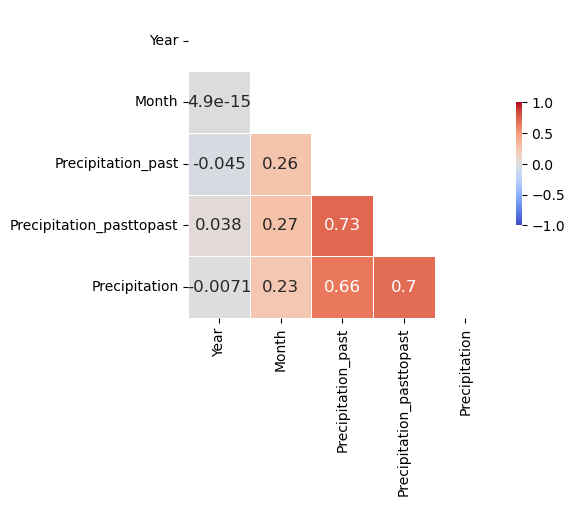

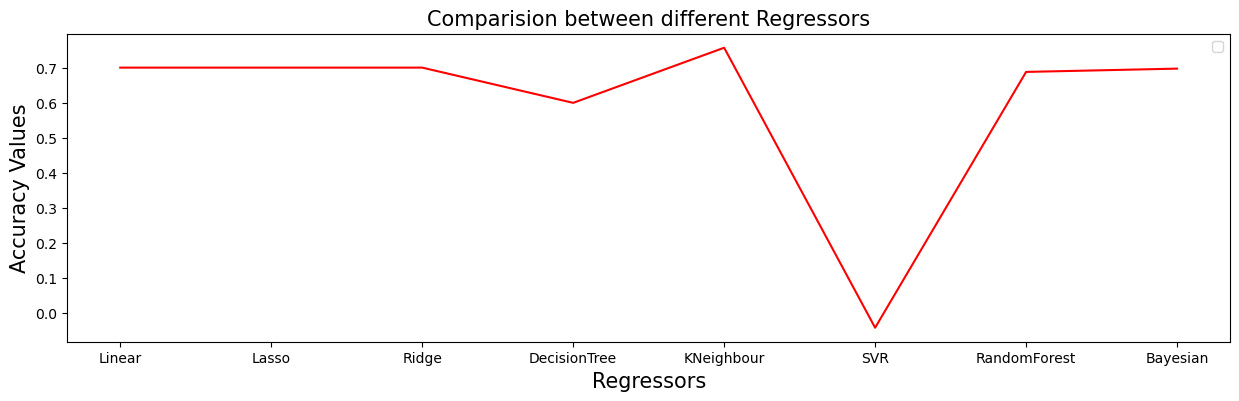

In [55]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## KNeighbour Regressor is sutaible for Precipitation with accuracy of 75.69% followed by Bayesian Regressor with accuracy of 69.72%

In [56]:
precipitation2020=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\Precipitation\precipitation2020pred.csv")

In [57]:
precipitation2020=precipitation2020.drop('Year',axis=1)

In [58]:
precipitation2020=precipitation2020.iloc[:,:].values

In [59]:
precipitation2020

array([[1.0000e+00, 0.0000e+00, 9.0000e-02],
       [2.0000e+00, 1.9864e+02, 0.0000e+00],
       [3.0000e+00, 2.3660e+01, 5.0000e-02],
       [4.0000e+00, 7.7930e+01, 1.0000e-01],
       [5.0000e+00, 4.4100e+00, 1.0700e+00],
       [6.0000e+00, 2.3342e+02, 4.0900e+00],
       [7.0000e+00, 1.3709e+02, 5.1700e+00],
       [8.0000e+00, 4.0580e+01, 4.5300e+00],
       [9.0000e+00, 1.9704e+02, 1.9800e+00],
       [1.0000e+01, 1.2480e+02, 7.4000e-01],
       [1.1000e+01, 1.7290e+01, 4.4000e-01],
       [1.2000e+01, 2.6800e+00, 1.0000e-02]])

In [60]:
precipitation2020_pred=[]

In [61]:
#Using Kneighbour regressor for prediction
precipitation2020_pred=kn.predict(precipitation2020)

In [62]:
precipitation2020_pred

array([9.0000e-02, 1.5806e+02, 1.4160e+01, 3.5890e+01, 8.0600e+00,
       1.5806e+02, 1.0436e+02, 4.3100e+00, 1.5806e+02, 1.0436e+02,
       1.0000e-02, 1.0000e-02])

In [63]:
#Predicting for 2020
preci_data=pd.DataFrame(data=precipitation2020_pred)
preci_data

,0
0,0.09
1,158.06
2,14.16
3,35.89
4,8.06
5,158.06
6,104.36
7,4.31
8,158.06
9,104.36


In [64]:
#Exporting the predictions of 2020 into csv file
preci_data.to_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\Precipitation\2020precip.csv")
